# Homework 13 : Julia_1101 Yu_Hao Tseng
## PPT : 16_Mata-programming.pptx (p.1)
### https://github.com/ja754969/Julia-Programming/blob/master/Homework/hw13_TsengYuHao.ipynb
---

# Practice
---
## Expression

In [1]:
:(2+2)

:(2 + 2)

In [2]:
x = :(2+2)

:(2 + 2)

In [3]:
typeof(x)

Expr

In [4]:
eval(x)

4

In [5]:
x = :(y=2+2)

:(y = 2 + 2)

## Evaluating expressions
### To run an remembered expression, use ```eval()```

In [7]:
eval(x)

4

In [8]:
y

4

---
## Some other ways to write expression
### same as ```:(2+2)```

In [9]:
quote
    2+2
end

quote
    #= In[9]:2 =#
    2 + 2
end

### same as ```x = :(2+2)```

In [10]:
x = quote
    2+2
end

quote
    #= In[10]:2 =#
    2 + 2
end

In [11]:
quote
    for i = 1:10
        println(i)
    end
end

quote
    #= In[11]:2 =#
    for i = 1:10
        #= In[11]:3 =#
        println(i)
    end
end

In [12]:
z = quote
    for i = 1:10
        println(i)
    end
end

quote
    #= In[12]:2 =#
    for i = 1:10
        #= In[12]:3 =#
        println(i)
    end
end

In [13]:
zz = :(
    for i = 1:10
        println(i)
    end
    )

:(for i = 1:10
      #= In[13]:3 =#
      println(i)
  end)

---

In [14]:
eval(zz)

1
2
3
4
5
6
7
8
9
10


---
## Interpolating expressions

In [15]:
a = 1

1

In [17]:
ex = :($a + b) # interpolation of "a"

:(1 + b)

In [18]:
# Interpolation of "cos(pi)"
ex2 = quote
    s = $(cos(pi))
end

quote
    #= In[18]:3 =#
    s = -1.0
end

---
## Application of metaprogramming

In [19]:
:(m1 = 1)

:(m1 = 1)

In [26]:
for k = 1:4
    display(:(mk=k))
end

:(mk = k)

:(mk = k)

:(mk = k)

:(mk = k)

In [27]:
for k = 1:4
    display(:(mk=$k))
end

:(mk = 1)

:(mk = 2)

:(mk = 3)

:(mk = 4)

In [29]:
string("m",1) # combine the string

"m1"

In [32]:
for k = 1:4
    display(:( $(string("m",k))=$k ))
end

:("m1" = 1)

:("m2" = 2)

:("m3" = 3)

:("m4" = 4)

In [34]:
for k = 1:4
    display(:( $(Symbol(string("m",k))) = $k ))
end

:(m1 = 1)

:(m2 = 2)

:(m3 = 3)

:(m4 = 4)

---
### Running the expression using "eval"

In [35]:
for k = 1:4
    eval(:( $(Symbol(string("m",k))) = $k ))
end

In [36]:
m1

1

In [37]:
m2

2

In [38]:
m3

3

In [39]:
m4

4

In [41]:
for k = 1:100
    eval(:( $(Symbol(string("m",k))) = $k ))
end

In [42]:
m100

100

---

In [43]:
varname = "ff"
for k = 1:100
    eval(:( $(Symbol(string(varname,k))) = $k ))
end

In [44]:
ff100

100

---
## Reading NetCDF file
###  Continue : Homework 12 : Julia_1101 Yu_Hao Tseng
#### PPT : 15_IO.pptx (p.33)
##### https://github.com/ja754969/Julia-Programming/blob/master/Homework/hw12_TsengYuHao.ipynb
---


### NetCDF (network Common Data Form) is a file format for storing multidimensional scientific data (variables) such as temperature, humidity, pressure, wind speed, and direction. 
### The data in a netCDF file is stored in the form of arrays : http://desktop.arcgis.com/en/arcmap/10.3/manage-data/netcdf/fundamentals-of-netcdf-data-storage.htm



In [46]:
using NetCDF

In [48]:
f = "./Files_Julia_IO_Final/test.nc"
info = ncinfo(f)
println(info)


##### NetCDF File #####

g:\我的雲端硬碟\海大1101_1102\Julia 程式語言設計_1101\Julia_git_repo\Homework\Files_Julia_IO_Final\test.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
column                                              3                         
row                                                 2                         

##### Variables #####

Name                            Type            Dimensions                      
--------------------------------------------------------------------------------
Depth                           DOUBLE          row column                      

##### Attributes #####

Variable            Name                Value                                   
--------------------------------------------------------------------------------
nothing


---

In [51]:
f = "./Files_Julia_IO_Final/test.nc"
tt = ncread(f, "Depth")
ncclose(f)

In [52]:
tt

2×3 Matrix{Float64}:
 4.0  5.0  6.0
 7.0  8.0  9.0

---

In [53]:
f = "./Files_Julia_IO_Final/argo-profiles.nc"
info = ncinfo(f)
println(info)


##### NetCDF File #####

g:\我的雲端硬碟\海大1101_1102\Julia 程式語言設計_1101\Julia_git_repo\Homework\Files_Julia_IO_Final\argo-profiles.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
DATE_TIME                                           14                        
STRING4                                             4                         
STRING64                                            64                        
N_LEVELS                                            58                        
STRING2                                             2                         
N_CALIB                                             1                         
STRING8                                             8                         
STRING32                                            32                        
N_PARAM                                             3  

# Exercise #3

In [55]:
f = "./Files_Julia_IO_Final/argo-profiles.nc"
PRES = ncread(f, "PRES")
TEMP = ncread(f, "TEMP")

ncclose(f)

In [60]:
length(PRES)

58

In [62]:
length(TEMP)

58

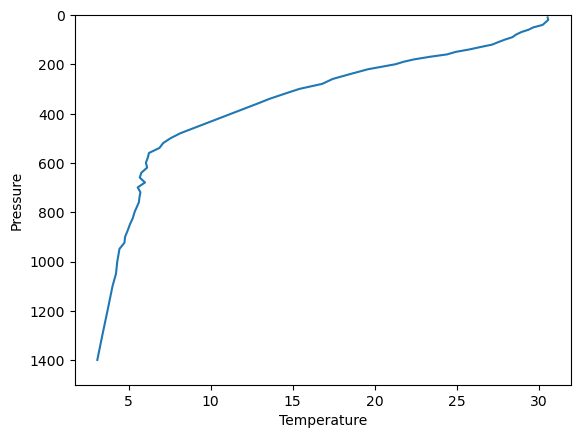

(1500.0, 0.0)

In [70]:
using PyPlot
plot(TEMP,PRES)
ylabel("Pressure")
xlabel("Temperature")
ylim(1500,0)